# 02-1 훈련 세트와 테스트 세트

**지도 학습과 비지도 학습**

머신러닝은 크게 지도 학습과 비지도 학습으로 나눌 수 있다.  (+ 강화 학습)



*   지도 학습

    : 훈련하기 위한 데이터(입력_input)와 정답(타깃_target)이 필요
*   비지도 학습

    : 정답을 사용하지 않는다.. 데이터를 잘 파악하거나 변형하는 데 도움을 준다

*   강화 학습
    
    : 알고리즘이 행동한 결과로 얻은 보상을 사용해 학습하는 알고리즘

앞선 Chapter1의 모델은 모든 데이터를 저장하고 맞추는 거니까 당연히 100%의 정확도여야 한다...

시험 문제와 정답을 미리 알려주고 시험을 친 꼴이다!!

성능을 제대로 평가하려면 훈련 데이터(훈련세트)와 평가에 사용하는 데이터(테스트세트)가 달라야한다!

In [ ]:
# 다시 데이터를 준비한다

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
# 다시 2차원 리스트(리스트의 리스트)로 만든다

fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14
# 하나의 생선 데이터를 샘플이라고 부른다.. -> 총 49개의 샘플
# 특성은 길이와 무게 : 총 2개

In [ ]:
# 클래스를 임포트하고 모델 객체를 만든다

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

여기서부터 약간 잘못된 케이스

: 훈련세트에는 전부 다 도미가 들어가있고 테스트세트에는 전부 다 빙어가 들어가 있다. => 샘플링 편향이 발생...

In [ ]:
# 데이터 분류

# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]
# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]
# 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]
# 테스트 세트로 타깃값 중 35번째부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

In [ ]:
# 훈련세트로 fit() 메서드를 사용하여 모델을 훈련하고, 테스트세트로 score() 메서드를 호출해 평가..

kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)
# 오잉 빵점이 나왔다!

0.0

여기까지 샘플링 편향 오류의 예시다...

훈련은 전부다 도미로 시키고 테스트는 빙어로 다 테스트 했다...

그래서 훈련 세트와 테스트 세트를 나누기 전에 데이터를 골고루 뽑아서 나누어야 한다.

**넘파이 라이브러리**

넘파이는 고차원(dimension)의 배열을 손쉽게 행렬형태로 만들고 조작할 수 있는 간편한 도구를 많이 제공한다!!

1차원 배열 : 선 / 2차원 배열 : 면 / 3차원 배열 : 공간

행렬로 생각하면 축의 시작은 왼쪽 위부터 시작한다.

In [ ]:
# 넘파이 임포트해서 확인해보기

import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [ ]:
# 깔끔하게 2차원 배열로 정리되었다..

print(input_arr)
#49개의 행(샘플)과 2개의 열(특성)을 확인할 수 있다.

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
# 이 명령을 사용하면 (샘플 수, 특성 수)를 출력할 수 있다

print(input_arr.shape)

(49, 2)


훈련세트와 테스트세트로 나눌 때 같은 위치는 함께 이동해야 한다.

-> 그러기 위해서 index를 새로 만들어서 이용해준다.

In [ ]:
# 샘플이 49개 이므로 49개의 index를 만들어서 얘들을 섞는다

np.random.seed(42)      #일정한 결과를 얻기위한 시드 지정
index = np.arange(49)
np.random.shuffle(index)        # 무작위로 섞음

In [ ]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [ ]:
# 배열 인덱싱

print(input_arr[[1,3]])
# 2,4 번째 인덱스의 자료만 가져올 수도 있다

[[ 26.3 290. ]
 [ 29.  363. ]]


In [ ]:
# 이제 섞인 index를 가지고 훈련 / 테스트 세트로 나눈다

train_input = input_arr[index[:35]]         #섞인 것 중 앞에서 35개
train_target = target_arr[index[:35]]       #섞인 것 중 앞에서 35개

# 이제 섞였다..

In [ ]:
# 테스트 세트도 만들자

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

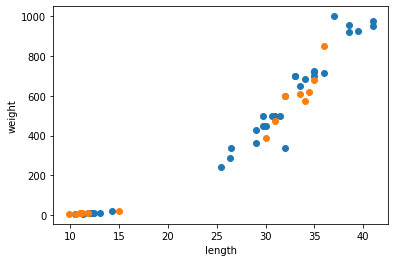

In [ ]:
# 훈련 / 테스트 세트로 잘 나누어졌는지 확인하는 산점도 그리기

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])           #train_input[:,0] : 생선의 길이  /  train_input[:,1] : 생선의 무게
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

**두 번째 머신러닝 프로그램**

나누어진 훈련세트로 훈련(fit)시키고 테스트세트로 점수를 확인한다.

In [ ]:
# 훈련시키자

kn = kn.fit(train_input, train_target)

In [ ]:
# 확인해보자

kn.score(test_input, test_target)
# 정확도 100퍼...

1.0

In [ ]:
# predict() 메서드로 테스트세트에 있는것들을 예측해보자

kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
# 실제 정답은...?

print(test_target)
# 오 위의 예측값이랑 똑같다!

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


# 02-2 데이터 전처리

In [ ]:
# 일단 데이터를 가져오자


fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
# 넘파이를 임포트

import numpy as np

In [ ]:
# 리스트의 리스트를 쉽게 만들어주는 numpy의 column_stack() 메서드..

np.column_stack(([1,2,3],[4,5,6]))
# 리스트의 튜플로 전달해야한다!
# 두 리스트를 일렬로 세운 뒤 나란히 옆으로 붙였다!

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
# 그럼 실제 데이터도 저렇게 리스트의 리스트로 만들자..

fish_data = np.column_stack((fish_length, fish_weight))
# 얘도 튜플로 전달...

In [ ]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
# 타깃값도 np.ones랑 np.zeros를 이용해서 쉽게 만들자..
# column_stack() 과 달리 concatenate() 메서드를 이용하면 만들 수 있다.

fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [ ]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


**사이킷런으로 훈련세트와 테스트세트 만들기**

사이킷런의 train_test_split() 메서드를 이용해서 비율에 맞게 훈련 / 테스트 세트로 나눌 수 있다!

In [ ]:
# 사이킷런 모듈 임포트

from sklearn.model_selection import train_test_split

In [ ]:
# fish_data 와 fish_target 을 훈련 / 테스트 세트로 나눈다!!

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)
# default값으로 훈련 / 테스트 세트의 샘플 갯수를 3:1로 나눈다!

In [ ]:
# 몇 개로 나누어졌는지 확인!

print(train_input.shape, test_input.shape)      #훈련세트의 샘플 갯수 / 테스트세트의 샘플 갯수
print(train_target.shape, test_target.shape)    #훈련세트의 타깃 갯수 / 테스트세트의 타깃 갯수

(36, 2) (13, 2)
(36,) (13,)


In [ ]:
# 잘 섞였는지 테스트 데이터 출력

print(test_target)
# 여기서는 도미와 빙어의 비율은 3.3:1
# 원래 전체 데이터에서 두 생선의 비율은 2.5:1
# => 고르게 분포되지 않았다!! 샘플링 편향!

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# stratify 매개변수에 타깃 데이터를 넣으면 종류(클래스)의 비율에 맞게 나뉘어 진다!

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42)

In [ ]:
# 다시 결과를 보자

print(test_target)
# 도미와 빙어의 비율이 2.25 : 1 이 되었다!

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


이제 훈련 / 테스트 세트로 고르게 나누었고 다시 k-최근접이웃 훈련을 해보자!!

목표는 **수상한 도미 한마리** 바로 잡기

In [ ]:
# k - 최근접이웃으로 훈련시킴

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)           # 훈련세트로 훈련시키고
kn.score(test_input, test_target)           # 테스트세트로 점수확인

1.0

In [ ]:
# 길이가 25이고 무게가 150인 도미의 데이터를 넣고 결과를 예측해보자!

print(kn.predict([[25, 150]]))      # 리스트의 리스트로 예측해야 하고, 도미로 예측되어야 하는데... 빙어로 예측됨..

[0.]


**기준을 맞춰라**

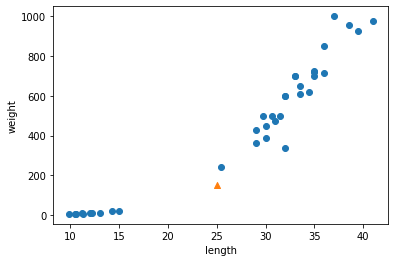

In [ ]:
# 왜그럴까... 산점도로 한번 봐보자

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])           #train_input[:,0] : 생선의 길이  /  train_input[:,1] : 생선의 무게
plt.scatter(25, 150, marker = '^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()
# 분명 위의 도미들의 데이터에 더 가까워보이는데 왜 빙어로 예측할까...??

In [ ]:
# 문제의 [25, 150] 근처의 5개의 최근접 이웃을 알아보자...

distances, indexes = kn.kneighbors([[25, 150]], n_neighbors=21)

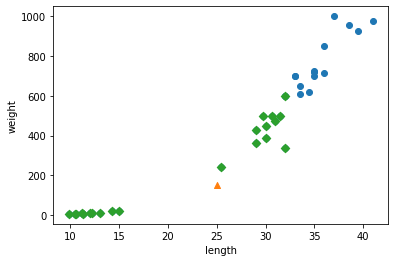

In [ ]:
# 훈련 데이터 중에서 위의 셀에서 찾아낸 최근접 이웃들은 따로 표시해보자

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker = 'D')         # 찾은 인덱스들의 길이/무게로 산점도를 찍자
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 띠용.. 좀더 자세히 보자..

print(train_input[indexes])
print(train_target[indexes])
print(distances)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


x축과 y축의 비율이 안 맞다!! => 맞춰줘야한다!! 표준화(평균빼고 표준편차로 나눔)

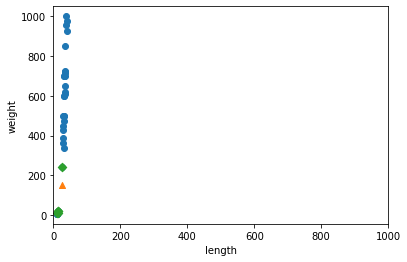

In [ ]:
# x, y축을 모두 0~1000으로 맞춰보자

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlim((0, 1000))     #x축 범위 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

두 특성의 값이 놓인 범위가 너무 다르다... => 이를 두 특성의 **스케일**이 안 맞다고 한다!!

데이터 전처리 : 특성값을 일정한 기준으로 (ex. 표준화) 맞춰주는 작업

표준화를 해보자!!

In [ ]:
# 각 특성별 평균과 표준편차를 구하자

mean = np.mean(train_input, axis = 0)           #train_input은 (36,2)크기의 배열이다... axis = 0으로 하면 하나의 각 열을 따라 내려오는 방향으로 계산한다
std = np.std(train_input, axis = 0)

In [ ]:
# 각 특성에 대한 평균과 표준편차

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
# 브로드캐스팅한다...

train_scaled = (train_input - mean)/std
# train_input은 (36,2) 크기이고 mean과 std는 (1,2)크기이지만 넘파이는 자동으로 모든 행에 대해서 계산해준다!

**전처리 데이터로 모델 훈련하기**

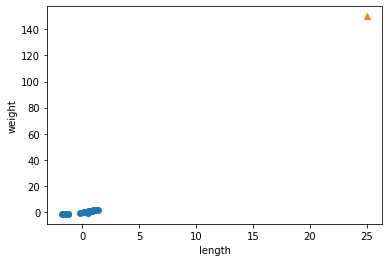

In [ ]:
# 표준점수로 변환한 train_scaled를 이용해서 다시 산점도...

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 결과가 이상... 모든 데이터를 스케일링했으니 당연히 예측하고 싶은 데이터도 스케일링 한 뒤에 예측해야한다..

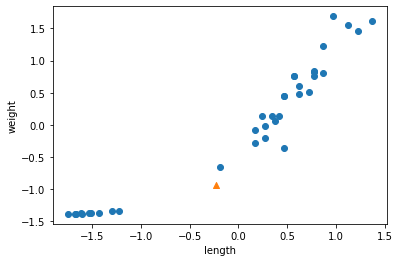

In [ ]:
# 예측하고 싶은 데이터[25,150]를 훈련세트 전체의 평균과 표준편차로 스케일링 해야한다!! (앞에서 구한 mean과 std..)

new = ([25, 150] - mean) / std          #스케일링
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 이제 스케일링까지 다 했고, 다시 훈련시키자...

kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# 정확도를 보기 위해서 테스트세트를 이용할 때도 테스트세트를 스케일링 해주어야한다... 물론 훈련세트의 평균과 표준편차로!!!
# 타깃값은 스케일링이 필요가 없다... 당연하게도..

test_scaled = (test_input - mean) / std

In [ ]:
kn.score(test_scaled, test_target)

1.0

In [ ]:
# 아까 수상한 도미 한마리를 스케일링한 new라는 데이터를 예측해보자!!

print(kn.predict([new]))        #리스트의 리스트로 넣어야함...
# 이제야 도미로 예측하네...

[1.]


스케일링을 한 데이터들에서 최근접 이웃을 다시 구해보자!!

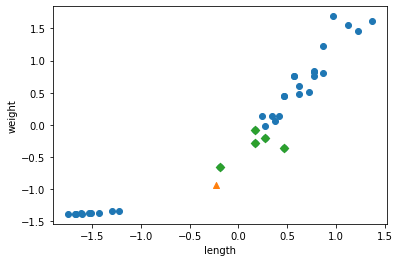

In [ ]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 이제야 제대로 나오네...

**중요 키워드**

- 데이터 전처리 : 머신러닝 모델에 훈련 데이터를 주입하기 전에 가공하는 단계
- 표준점수 : 훈련 세트를 스케일링하는 대표적인 방법 중 하나
- 브로드캐스팅 : 크기가 다른 넘파이 배열에서 자동으로 사칙연산을 모든 행이나 열로 확장해서 수행하는 기능!!

**핵심 패키지와 함수**

scikit-learn 모듈
    
    1) train_test_split() 메서드 
    - 훈련 데이터를 훈련 / 테스트 세트로 나누는 함수 (기본비율 3:1)
    - 비율 지정은 startify 매개변수 지정
    
    2) kneighbors() 메서드
    - k-최근접 이웃 객체의 메서드이고, 가까운 이웃까지의 거리와 가까운 이웃의 인덱스를 반환

In [ ]:
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)

for n in range(5,50):
    # 이웃 개수 설정
    kn.n_neighbors = n      #kn의 이웃 개수는 자동으로 바뀌어서 적용된다
    # 점수 계산
    score = kn.score(test_scaled, test_target)
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n,score)
        break

21 0.6923076923076923
